In [13]:
import numpy as np #use to handle multi dimensional arrays it provides easy way to perform vectorized operations
import pandas as pd # provides high performance easy to use data structures and data analysis tools for python

import matplotlib as mpl # use for plotting 2d graphs
import matplotlib.pyplot as plt # collection of command style functions that makes matplotlib work like matlab


from matplotlib.animation import FuncAnimation # makes animation by repeatedly calling a function func 
#sklearn provides modules for loading, splitting, preprocessing datasets etc.
from sklearn.datasets import load_boston #Load the boston dataset that has 506 samples, 13 dimensionality, real, positive features, target 5.-50
from sklearn.metrics import mean_squared_error # compute mean_squared_error between true and pridicted values
from sklearn.model_selection import train_test_split # takes dataset as features and targets and splits them into training and testing sets
from sklearn.preprocessing import MinMaxScaler # Use for normalization



from IPython.display import HTML # to display results on screen 


%matplotlib inline


# Steps to solve problem using ML techniques are:
1. Data preprocessing
2. Error defining
3. splitting data: testing and training
4. train the model: i.e "learning" the target function from given training data. Choosing ML algo for problem. train it on model. Test the model with testing data
5. Prediction

# Step 1: Data Preprocessing

In [14]:
#Load the dataset
boston=load_boston()

# Description of the dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [15]:
#Put the data into pandas DataFrames
features=pd.DataFrame(boston.data,columns=boston.feature_names)
features    

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [16]:
features['AGE']

0       65.2
1       78.9
2       61.1
3       45.8
4       54.2
5       58.7
6       66.6
7       96.1
8      100.0
9       85.9
10      94.3
11      82.9
12      39.0
13      61.8
14      84.5
15      56.5
16      29.3
17      81.7
18      36.6
19      69.5
20      98.1
21      89.2
22      91.7
23     100.0
24      94.1
25      85.7
26      90.3
27      88.8
28      94.4
29      87.3
       ...  
476     93.6
477     97.3
478     96.7
479     88.0
480     64.7
481     74.9
482     77.0
483     40.3
484     41.9
485     51.9
486     79.8
487     53.2
488     92.7
489     98.3
490     98.0
491     98.8
492     83.5
493     54.0
494     42.6
495     28.8
496     72.9
497     70.6
498     65.3
499     73.5
500     79.7
501     69.1
502     76.7
503     91.0
504     89.3
505     80.8
Name: AGE, Length: 506, dtype: float64

Does anyone realize that there is no column called ‘PRICE’ in the data frame? Yes, it is because the target column it’s available in other attribute called target. the name within ['  '] is used to name the dataset. Here we are keeping as target but we can also give its name as price for this problem


In [17]:
target = pd.DataFrame(boston.target,columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [18]:
max(target['target'])

50.0

In [19]:
min(target['target'])

5.0

In [20]:
#Concatenate features and target into a single DataFrame
#axis = 1 makes it concatenate column wise. By default concatination takes place row-wise
df=pd.concat([features,target],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


#   Visualization

describe(): use to generate a summary of dataset.

describe() computes the following parameters of each column

count: No. of rows
mean: mean of column
std: std. deviation of column
min: min value of column
max: max value of column
25%: 25 percentile
50%: 50 percentile
75%: 75 percentile

percentile: value below which a given percentage of observations in a group of observations falls.

In [21]:
# Use round(decimals=2) to set the precision to 2 decimal places
df.describe().round(decimals = 2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.59,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.65,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


# Correlation
i.e how closely variables in one column dependent on variables of another cloumn

+ve correlation: values in one column decrease values in another also decrease or values in one column increase values in another also increase

-ve correlation: values in one column decrease values in another increase or values in one column increase values in another also decrease

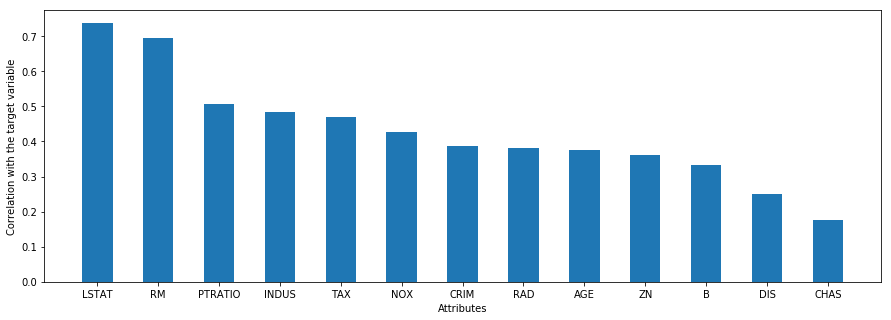

In [23]:
# Calculate correlation between every column on the data
corr = df.corr('pearson') # here we have use pearson correlation.Here corr function returns pearson correlation coefficient values between each pair of attributes.

# Our target is to find the attribute with highest correlation coefficient values with the target

# Take absolute values of correlations to extract correlation between each attribute and target 
corrs = [abs(corr[attr]['target']) for attr in list(features)]

#Make a list of pairs [(corr, feature)]
l = list(zip(corrs, list(features)))

#Sort the list of pairs in reverse/descending order, for that we have use reverse=True as it is false by default
#lambda function is use to write a function in shorter form. here it is use to extract key for sorting
l.sort(key = lambda x : x[0], reverse=True)

#"Unzip" pairs to two lists
#Zip(*l) - takes a list that looks like [[a,b,c], [d,e,f], [g,h,i]]
#and returns [[a,d,g],[b,e,h],[c,f,i]]
#Thus this will give 10 coefficient correlation values in descending order with matching labels.

corrs, labels = list(zip((*l)))

#Plot correlation with respect to the target variable as a bar graph

index = np.arange(len(labels)) # generating index with length equal to length of attributes. this will be send as parameter to functions
plt.figure(figsize=(15, 5))
plt.bar(index, corrs, width=0.5) # plotting bar graph

#Give labels to x and y axis (optional) 
plt.xlabel('Attributes')
plt.ylabel('Correlation with the target variable')
plt.xticks(index, labels) #use to identify which bar corresponds to which feature
plt.show() #generating graph

# From the fig. we can see that LSTAT & RM have the 2 highest absolute correlation values. Therefore, LSTAT will be treated as independent variable
Also if LSTAT goes up prices of houses go down
If RM is high price of house is also high
If PTRATIO is low price of house is high

# Normalize the data
Normalize the data with MinMaxScaler
Normalize will bring all data to a common scale. in our case between 0 and 1

Preparing data for linear-regression algorithm

In [24]:
X=df['LSTAT'].values
Y=df['target'].values

In [25]:
#Before normalization
print(Y[:5])

[ 24.   21.6  34.7  33.4  36.2]


In [26]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1,1))# Here normalization takes place
X = X[:, -1]

y_scaler = MinMaxScaler()
Y =y_scaler.fit_transform(Y.reshape(-1,1))# Here normalization takes place
Y = Y[:, -1]

In [27]:
#After normalization
print(Y[:5])

[ 0.42222222  0.36888889  0.66        0.63111111  0.69333333]


# The 3 functions that constitute the model are:

#error: function that returns mean squared error in the predicted values for m and c
#update: function that changes values of m and c
#gradient_descent: optimization algorithm to minimize functions



# Step 2. Define error

In [28]:
# During learning phase our objective is to minimize error function
# Here we are Computing error by computing difference between true value(i.e values from dataset) and predicted value(i.e values we will compute with current weights)

#Now here we will define the error function
def error(m, x, c, t): # Here weights are m and c
    N = x.size
    e = sum(((m * x + c) - t) ** 2)#compute sum of the square of differences
    return e * 1/(2 * N)#Here, N is no. of examples in dataset. This gives the mean square error
#since we have continuousdata therefore we have use mean square error

# Step 3. Split the data

# Split the data into fix sets


In [29]:
#0.2 indicates 20% of the data is randomly sampled as testing data
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)# x means feature & y is target

In [30]:
# Now here we will define the update function

# Here x and t are numpy arrays
def update(m, x, c, t, learning_rate):# m: slope, x: independent variable values, c: line intercept, t: target values
    grad_m = sum(2 * ((m * x + c) - t) * x) #Computing gradient m
    grad_c = sum(2 * ((m * x + c) - t)) #Computing gradient c
# Now updating values    
    m = m - grad_m * learning_rate
    c = c - grad_c * learning_rate
    return m,c

In [31]:
#Now here we will define the gradient descent function

#init_m: initial estimate of slope m for linear regression line, init_c: initial estimate of intercept c,
#x:numpy array of the values of independent variable,
#t:numpy array of the values of target variable
#error_threshold: error_threshold after which training should end 
def gradient_descent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
    m = init_m
    c = init_c
    error_values = list()# empty list
    mc_values = list()
    for i in range(iterations):
        e = error(m, x, c, t)
        if e < error_threshold:
            print('Error less than threshold.Stopping gradient descent')
            break
        error_values.append(e)
        m, c= update(m, x, c, t, learning_rate)#updating values of m and c
        mc_values.append((m, c))#adding updating values to mc_values
    return m, c, error_values, mc_values    
        

In [32]:
%%time
# it is magic function use to get time needed to execution
init_m = 0.9 #slope can be either +ve or -ve
init_c = 0
learning_rate = 0.001 #must be below 0.0025 else it cause overfolw in weight values
iterations = 250
error_threshold = 0.001

#call the gradient descent
m, c, error_values, mc_values = gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate, iterations, error_threshold)

Wall time: 111 ms


# Visualization of model training

Animations may take a minute or more to processed
therefore select every 5th value(or larger interval) to reduce processing time. 

In [33]:
mc_values_anim=mc_values[0:250:5] #[start:end:interval]

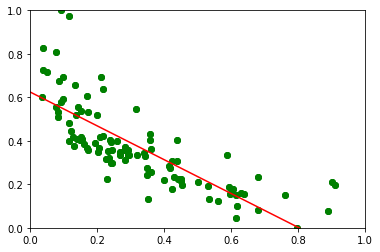

In [34]:
fig,ax=plt.subplots() #plt.subplots() returns figure and axis object
ln, =plt.plot([],[],'ro-',animated=True)#plt.plot() returns line objects. Here x & y are empty lists.

#for animation we need 2 functions
#1. init():to initialize state of a graph
#2. update_frame:to update each frame with new data

def init():
  plt.scatter(xtest,ytest,color='g')# scatter plot of training data
  ax.set_xlim(0,1.0)#limit of axis from 0 to 1
  ax.set_ylim(0,1.0)#limit of axis from 0 to 1
  return ln, #return line object

def update_frame(frame): #frame is +ve integer denoting frame no.
  m,c=mc_values_anim[frame] #we have list of m & c values and frame no. is use as an index
  x1,y1=-0.5,m*-.5+c #using m & c we calculate 2 end points of line (This is basically line equation y=mx+c)
  x2,y2= 1.5 ,m*1.5+c
  ln.set_data([x1,x2],[y1,y2])#Setting 2 end points of the line
  return ln,

anim=FuncAnimation(fig, update_frame, frames=range(len(mc_values_anim)),
                   init_func=init,blit=True) # this is the constructor, 
#frames=range(len(mc_values_anim) give no. of frames in animation, blit=True improves performance

HTML(anim.to_html5_video())#display video as HTML video

#We observe from fig. with each itteration regression line becomes more accurate and by the end regression line becomes less changing. 

# Visualization of the learning process
1. Plot the regression line against the training dataset set to visualize what the line looks like for training dataset
2. Plot the error values: graph shows how error drops over time
3. Plot the change in regression line throughout the training process: this graph helps you vizualive how m and c values are upate after each step

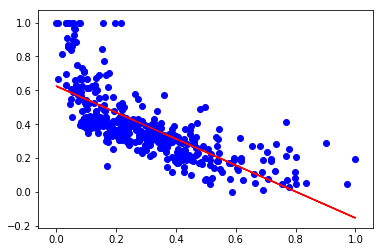

In [35]:
#Plotting regression line upon training dataset

plt.scatter(xtrain, ytrain, color='b') #training data represented as scatter

#Not plotting the regression line
plt.plot(xtrain, (m * xtrain + c) , color='r')  #xtrain + c : gives y coordinate values 

#We can observe training data has a slight curve. And the line is a good approximation of target values as line lies in center of the most dense part of training data
#This means line will give good price prediction for most inputs except some that lies at extreme points.

Text(0.5,0,'Iterations')

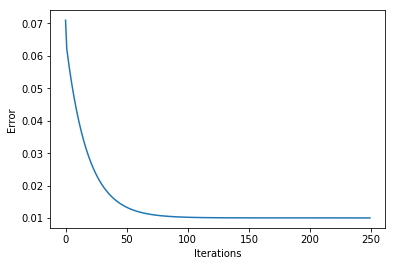

In [36]:
#Plotting error values

plt.plot(np.arange(len(mc_values)),error_values) #X-coordinate=len(mc_values)) and Y-coordinate=error_values

#Giving labels to x and y coordinates
plt.ylabel('Error')
plt.xlabel('Iterations')


#From fig we observe that error value decrease with each itteration
#also aftercertain no.of itterations plot is parallel. Meaning even if no. of itteration is high it will not reduce error value 

# Step 5. Prediction

In [37]:
#Calculate the predictions on the test set as a vectorized operation 
predicted=(m*xtest)+c

In [38]:
#compute mean square error for predicted values on the testing dataset
mean_squared_error(ytest,predicted)

0.014834179502539716

In [39]:
#Put x-test, y-test and predicted values into a single dataframe so that we
#can see the predicted values alongside the training set

p=pd.DataFrame(list(zip(xtest,ytest,predicted)),columns=['x','target_y','predicted_y'])
p.head()

,x,target_y,predicted_y
0,0.613687,0.044444,0.147398
1,0.244205,0.360000,0.434774
2,0.360927,0.364444,0.343990
3,0.357616,0.402222,0.346565
4,0.449779,0.213333,0.274882


# Plot predicted values against target values
1. predicated values represented by red clour lines
2. target values represented by blue clour points

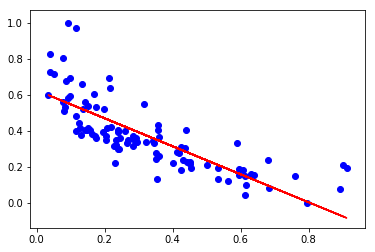

In [40]:
plt.scatter(xtest,ytest,color='b')
plt.plot(xtest,predicted,color='r')


#we can observe that line is in same direction as testing data

# Revert normalization to obtain predicted price of the in houses $1000s
The predicted values are in the range 0-1. This is not very useful to us when we want to obtain the price.
Use inverse_transform() to scale the values back to original representation

In [41]:

#Reshape to change the shape that is required by the scaler
predicted=predicted.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)

#Here we are obtaining data in the original scale
xtest_scaled=x_scaler.inverse_transform(xtest)
ytest_scaled=y_scaler.inverse_transform(ytest)
predicted_scaled=y_scaler.inverse_transform(predicted)

# This is to remove extra dimension
xtest_scaled=xtest_scaled[:,-1]
ytest_scaled=ytest_scaled[:,-1]
predicted_scaled=predicted_scaled[:,-1]

# Obtaining the values side by side
p=pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)),columns=['x','target_y','predicted_y'])
p=p.round(decimals=2)
p.head()

,x,target_y,predicted_y
0,23.97,7.0,11.63
1,10.58,21.2,24.56
2,14.81,21.4,20.48
3,14.69,23.1,20.60
4,18.03,14.6,17.37
